# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [138]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
import seaborn as sns

/Users/marissabush/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [14]:
data.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [25]:
data.groupby(['Gender']).mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


In [26]:
data.groupby(['Gender']).std()

,Height,Weight
Gender,,
Female,2.696284,19.022468
Male,2.863362,19.781155


In [5]:
data = pd.read_csv("weight-height.csv")
male_df =  data[data['Gender'] == 'Male'].copy()
female_df =  data[data['Gender'] == 'Female'].copy()

print(f'Male Height mean: {male_df["Height"].mean()}')
print(f'Male Height sd: {male_df["Height"].std()}')
print(f'Male Weight mean: {male_df["Weight"].mean()}')
print(f'Male Weight sd: {male_df["Weight"].std()}')
print(f'Female Height mean: {female_df["Height"].mean()}')
print(f'Female Height sd: {female_df["Height"].std()}')
print(f'Female Weight mean: {female_df["Weight"].mean()}')
print(f'Female Weight sd: {female_df["Weight"].std()}')


# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

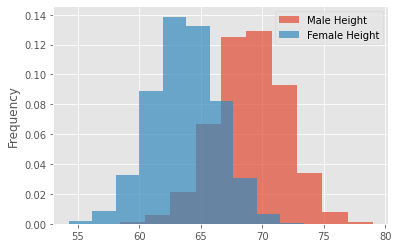

In [99]:
plt.hist(male_df['Height'], bins=10, alpha = 0.7, density = True, label = 'Male Height')
plt.hist(female_df['Height'], bins=10, alpha = 0.7, density = True, label = 'Female Height')
plt.ylabel('Frequency')
plt.legend()
plt.show();

In [18]:
# Record your observations - are these inline with your personal observations?
# Female heights are about 5'5 on average and male heights are about about 5'8 on average.


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [100]:
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

In [101]:
hist_inter = np.histogram(s, density = True)
hist_inter[0]

array([0.18901951, 0.18901951, 0.75607804, 1.51215608, 5.10352679,
       4.15842923, 3.02431217, 2.26823413, 1.13411706, 0.56705853])

In [102]:
hist_inter[1]

array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
       -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
        0.24307712])

In [131]:
density_x = []
for counter, x in enumerate(hist_inter[1]):
    if counter + 1 < len(hist_inter[1]):
        density_x.append((x + hist_inter[1][counter + 1]) / 2)

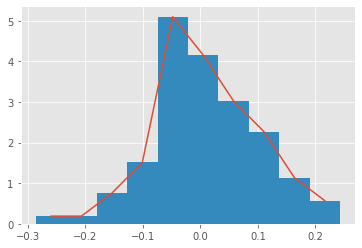

In [132]:
plt.plot(density_x, hist_inter[0])
plt.hist(s, density = True);

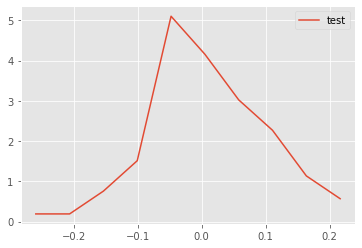

In [133]:
def density(my_array):
    hist_inter = np.histogram(my_array, density = True)
    density_x = []
    for counter, x in enumerate(hist_inter[1]):
        if counter + 1 < len(hist_inter[1]):
            density_x.append((x + hist_inter[1][counter + 1]) / 2)
    return density_x, hist_inter[0]

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

## Add overlapping density plots to the histograms plotted earlier

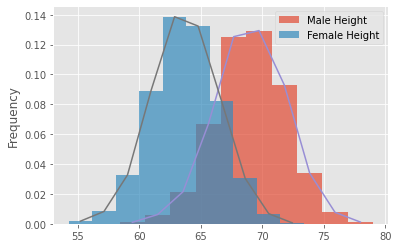

In [134]:
plt.hist(male_df['Height'], bins=10, alpha = 0.7, density = True, label = 'Male Height')
plt.hist(female_df['Height'], bins=10, alpha = 0.7, density = True, label = 'Female Height')
x_men, y_men = density(male_df['Height'])
plt.plot(x_men, y_men)
x_women, y_women = density(female_df['Height'])
plt.plot(x_women, y_women)
plt.ylabel('Frequency')
plt.legend()
plt.show();

## Repeat the above exercise for male and female weights

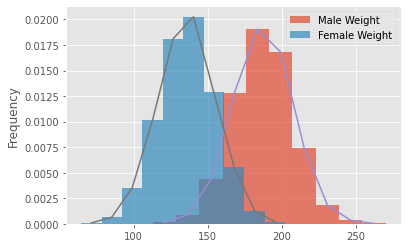

In [135]:
plt.hist(male_df['Weight'], bins=10, alpha = 0.7, density = True, label = 'Male Weight')
plt.hist(female_df['Weight'], bins=10, alpha = 0.7, density = True, label = 'Female Weight')
x_men, y_men = density(male_df['Weight'])
plt.plot(x_men, y_men)
x_women, y_women = density(female_df['Weight'])
plt.plot(x_women, y_women)
plt.ylabel('Frequency')
plt.legend()
plt.show();

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# Male and Female weight and heights make sense - if men are taller then it
# it would make sense if they weight more.
# What is the takeaway when comparing male and female heights and weights?
# 

## Repeat the above experiments in seaborn and compare with your results

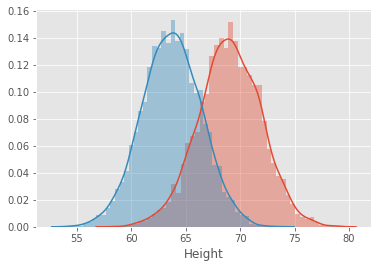

In [142]:
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height']);

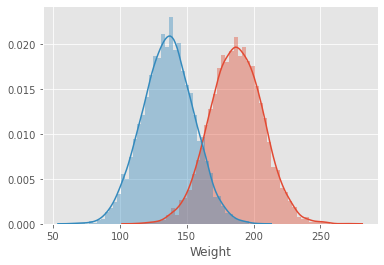

In [144]:
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight']);

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# For the height and weight graphs they are different by
# the bin sizes.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.